# DataScience project involving data-cleaning, model building using regression model and custom predictions using StreamLit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("fish.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe

<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [5]:
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

# Data Analysis


### Step1: Finding if there are any Null Values in our dataset.

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

#### As we can see there are a total of 0 null values we don't have to clean it #### 

### Step2: Finding number of unique values in each column.

In [8]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### Step3: Rearranging columns to get a dataset which has last column as weight.

In [9]:
columns1=list(df.columns)

In [10]:
columns1

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [11]:
columns2=['Species','Length1', 'Length2', 'Length3', 'Height', 'Width','Weight']

In [12]:
df=df[columns2]

In [13]:
df

Species  Length1  Length2  Length3   Height   Width  Weight
0     Bream     23.2     25.4     30.0  11.5200  4.0200   242.0
1     Bream     24.0     26.3     31.2  12.4800  4.3056   290.0
2     Bream     23.9     26.5     31.1  12.3778  4.6961   340.0
3     Bream     26.3     29.0     33.5  12.7300  4.4555   363.0
4     Bream     26.5     29.0     34.0  12.4440  5.1340   430.0
..      ...      ...      ...      ...      ...     ...     ...
154   Smelt     11.5     12.2     13.4   2.0904  1.3936    12.2
155   Smelt     11.7     12.4     13.5   2.4300  1.2690    13.4
156   Smelt     12.1     13.0     13.8   2.2770  1.2558    12.2
157   Smelt     13.2     14.3     15.2   2.8728  2.0672    19.7
158   Smelt     13.8     15.0     16.2   2.9322  1.8792    19.9

[159 rows x 7 columns]

# Model Building

### Step1: Converting non-numerical data to numerical data using Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
df['Species']=le.fit_transform(df['Species'])

In [17]:
df

Species  Length1  Length2  Length3   Height   Width  Weight
0          0     23.2     25.4     30.0  11.5200  4.0200   242.0
1          0     24.0     26.3     31.2  12.4800  4.3056   290.0
2          0     23.9     26.5     31.1  12.3778  4.6961   340.0
3          0     26.3     29.0     33.5  12.7300  4.4555   363.0
4          0     26.5     29.0     34.0  12.4440  5.1340   430.0
..       ...      ...      ...      ...      ...     ...     ...
154        5     11.5     12.2     13.4   2.0904  1.3936    12.2
155        5     11.7     12.4     13.5   2.4300  1.2690    13.4
156        5     12.1     13.0     13.8   2.2770  1.2558    12.2
157        5     13.2     14.3     15.2   2.8728  2.0672    19.7
158        5     13.8     15.0     16.2   2.9322  1.8792    19.9

[159 rows x 7 columns]

### Step2: Dividing the dataset into dependent and independent variables.

In [39]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
x

Species  Length1  Length2  Length3   Height   Width
0          0     23.2     25.4     30.0  11.5200  4.0200
1          0     24.0     26.3     31.2  12.4800  4.3056
2          0     23.9     26.5     31.1  12.3778  4.6961
3          0     26.3     29.0     33.5  12.7300  4.4555
4          0     26.5     29.0     34.0  12.4440  5.1340
..       ...      ...      ...      ...      ...     ...
154        5     11.5     12.2     13.4   2.0904  1.3936
155        5     11.7     12.4     13.5   2.4300  1.2690
156        5     12.1     13.0     13.8   2.2770  1.2558
157        5     13.2     14.3     15.2   2.8728  2.0672
158        5     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]

In [41]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

### Step3: Fitting the Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values)

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.predict([[0,23.3,25.4,30,11,4.1]])

array([261.15333479])

# Graphical Representations

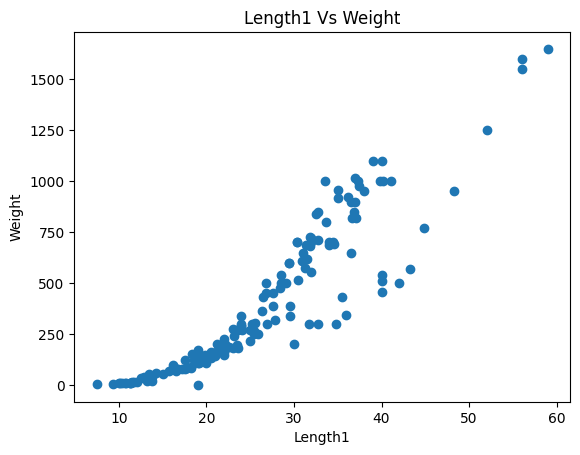

In [23]:
plt.scatter(df['Length1'],df['Weight'])
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.title("Length1 Vs Weight")
plt.show()

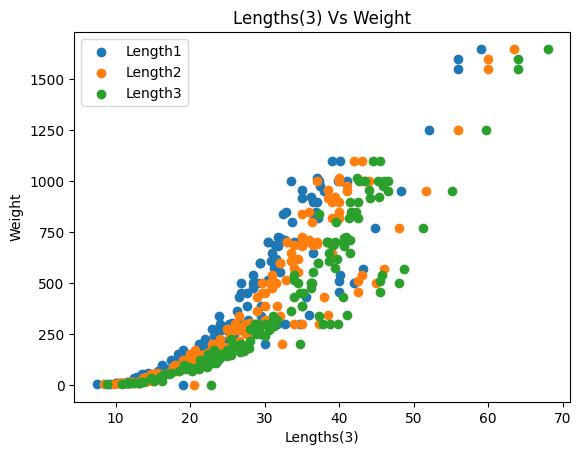

In [29]:
plt.scatter(df['Length1'],df['Weight'],label="Length1")
plt.scatter(df['Length2'],df['Weight'],label="Length2")
plt.scatter(df['Length3'],df['Weight'],label="Length3")
plt.xlabel("Lengths(3)")
plt.ylabel("Weight")
plt.title("Lengths(3) Vs Weight")
plt.legend()
plt.show()

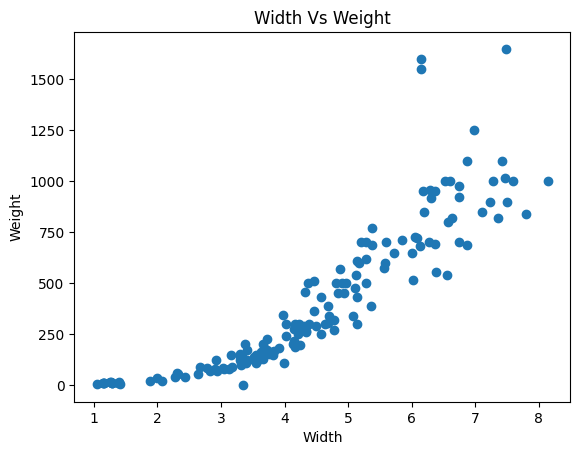

In [31]:
plt.scatter(df['Width'],df['Weight'])
plt.xlabel("Width")
plt.ylabel("Weight")
plt.title("Width Vs Weight")
plt.show()

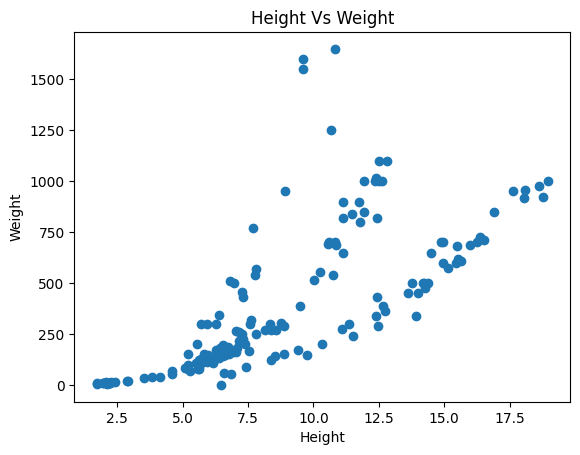

In [34]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height Vs Weight")
plt.show()

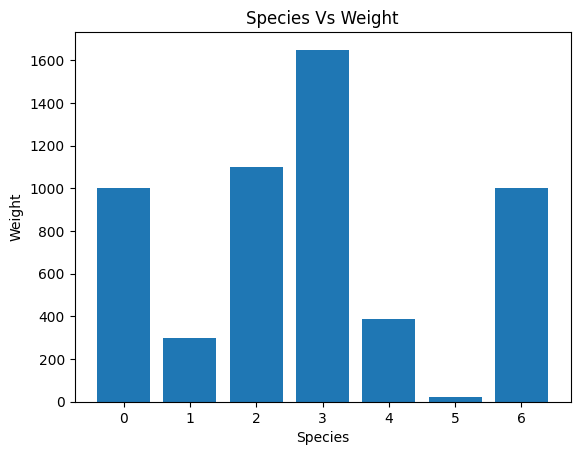

In [36]:
plt.bar(df['Species'],df['Weight'])
plt.xlabel("Species")
plt.ylabel("Weight")
plt.title("Species Vs Weight")
plt.show()